---

<h1 style="color: white; background-color:#b31b1b; padding: 50px; text-align: center;"> Cloning to Liddle, Copeland & Wands (1997) </h1>

<h1 style="color: white; background-color:#2f2a2a; padding: 20px; text-align: center;"> Exponential potentials and cosmological scaling solutions
<br>
[PhysRevD.57.4686](http://journals.aps.org/prd/abstract/10.1103/PhysRevD.57.4686)
<br>
[https://arxiv.org/abs/gr-qc/9711068](https://arxiv.org/abs/gr-qc/9711068)
</h1>
---

---
**Author**:      Efrain Torres-Lomas 

**Email**:       ``efrain@fisica.ugto.mx``

**Github**:      https://github.com/elchinot7

**Bitbucket**:   [https://bitbucket.org/elchinot7/pyncare](https://bitbucket.org/elchinot7/pyncare/)

**Date**:        September 2016
---

<h2 style="color: white; background-color:green; padding: 10px; text-align: center;">
Note:
</h2>

## An updated version of this notebook can be found at:
## [https://bitbucket.org/elchinot7/pyncare/EXAMPLES](https://bitbucket.org/elchinot7/pyncare/src/ea088e38e50377010d5c8fbead99c368ec92d214/examples/jupyter/cloning_liddle_copeland_wands_quintessence.ipynb?at=master&fileviewer=file-view-default)
#### Here I will use the ``pyncare`` Python package.

You can get it by doing:

    git clone https://elchinot7@bitbucket.org/elchinot7/pyncare.git

To install:

    python setup.py install
    

## Importing ``pyncare`` and other packages 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from pyncare.utils import plot_circle
from pyncare import BaseDynSys
%matplotlib notebook
#%matplotlib inline

import seaborn as sns
sns.set()
sns.set_context("talk") # paper, notebook, talk, and poster


<h2 style='color: white;  background-color:green; font-weight: bolder; text-align: center;'>
The Model

$$V=V_0 \exp^{-\lambda \gamma \phi}$$
</h2>

<h2 style='color: white;  background-color:#b31b1b; font-weight: bolder; text-align: center;'> 
The Dynamical System

\begin{eqnarray}
&& x^\prime = - 3 x + \lambda \sqrt{\frac{3}{2}} y^2 + \frac{3}{2} x \left[ 2 x^2 + \gamma \left( 1 - x^2 - y^2\right)\right]  \\
&& y^\prime = - \lambda \sqrt{\frac{3}{2}} xy + \frac{3}{2} y \left[ 2 x^2 + \gamma \left( 1 - x^2 - y^2\right)\right]
\end{eqnarray}
</h2>

In [2]:
def dm_plus_quintessence_dynsys(init, t=None, model_pars=[3.0]):
        if t is None:
            t = 1.0  # This is used to allows a call from "plot_vector_flow()"
        x = init[0]
        y = init[1]
        
        Lambda = model_pars[0]
        gamma = 1.0

        # the model equations
        A = 3.0 * (2.0 * x**2.0 +  gamma * (1.0 - x**2.0 - y**2.0)) / 2.0
        l = Lambda * np.sqrt(3.0/2.0)
        
        x_dot = -3.0 * x +  l * y**2.0 +  x * A 
        y_dot = - l * x * y +  y * A
        return [x_dot, y_dot]

# Numerical Solution:

- Define the Dynamical System Object
- Solve & Plot the orbits
- Add the constraints plots

**New!** Now is ease to use different predefined color schemes!

Just set

    colors='colorscheme'

where 'colorscheme' is one of 

    [None, 'deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']


---
## Cloning the Fig [https://inspirehep.net/record/451402/files/phase3.png](https://inspirehep.net/record/451402/files/phase3.png)
---
![fig4](https://inspirehep.net/record/451402/files/phase3.png)

<IPython.core.display.Javascript object>


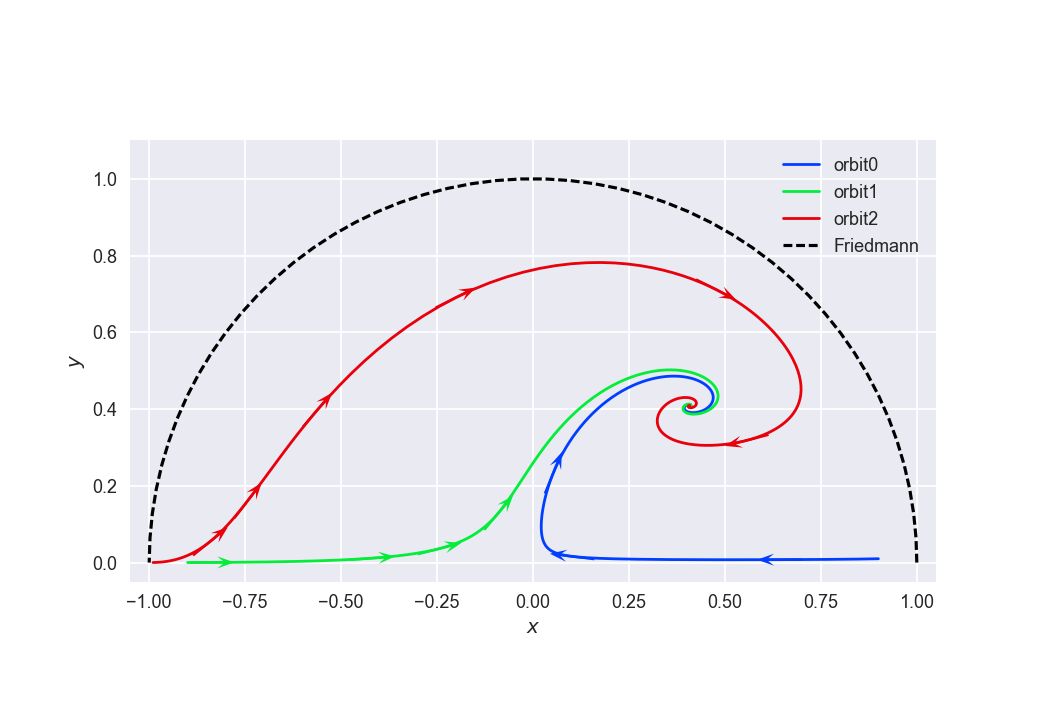

In [3]:
_lambda = 3.0

t = np.linspace(0.0, 10.0, 500)

var_names = {'x': r'$x$', 'y': r'$y$'}

orbits = [{'vars': OrderedDict([('x', 0.9), ('y', 0.01)]), 't': t, 'arrow_pos': [30, 100, 200], 'label': 'orbit0'},
          {'vars': OrderedDict([('x', -0.9), ('y', 0.0001)]), 't': t, 'arrow_pos': [10, 50, 70, 100], 'label': 'orbit1'},
          {'vars': OrderedDict([('x', -0.99), ('y', 0.0001)]), 't': t, 'arrow_pos': [50, 60, 70, 80, 100, 170], 'label': 'orbit2'},
         ]
dynsys = BaseDynSys(model=dm_plus_quintessence_dynsys,
                    model_pars=[_lambda],
                    var_names=var_names,
                    Ndim=2,
                    orbits=orbits,
                    lines=None,
                    #colors='black',
                    #colors='dark'
                    colors='bright'
                    )
fig = plt.figure()
ax = fig.add_subplot(111)

dynsys.plot_orbits(ax=ax, vars_to_plot=['x', 'y'], add_flow=True, lw=2)
plot_circle(ax=ax, theta_i=0, theta_f=np.pi, ls='--', color='k', label='Friedmann')
ax.set_ylim(-0.05, 1.1)
ax.set_xlim(-1.05, 1.05)
ax.legend(loc='best')
ax.set_aspect('equal')

---
## Cloning the Fig [https://inspirehep.net/record/451402/files/phase1.png](https://inspirehep.net/record/451402/files/phase1.png)
---
![fig3](https://inspirehep.net/record/451402/files/phase1.png)

<IPython.core.display.Javascript object>


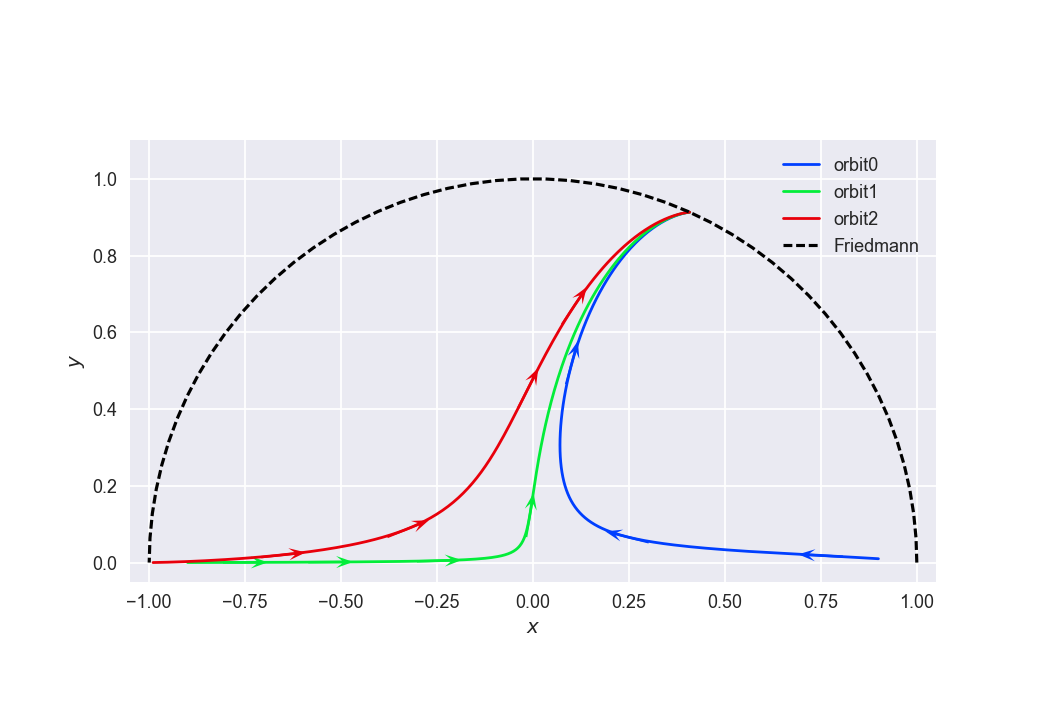

In [4]:
_lambda = 1.0

t = np.linspace(0.0, 10.0, 500)

var_names = {'x': r'$x$', 'y': r'$y$'}

orbits = [{'vars': OrderedDict([('x', 0.9), ('y', 0.01)]), 't': t, 'arrow_pos': [20, 70, 150], 'label': 'orbit0'},
          {'vars': OrderedDict([('x', -0.9), ('y', 0.0001)]), 't': t, 'arrow_pos': [20, 40, 70, 170], 'label': 'orbit1'},
          {'vars': OrderedDict([('x', -0.99), ('y', 0.0001)]), 't': t, 'arrow_pos': [70, 100, 150, 170], 'label': 'orbit2'},
         ]

dynsys = BaseDynSys(model=dm_plus_quintessence_dynsys,
                    model_pars=[_lambda],
                    var_names=var_names,
                    Ndim=2,
                    orbits=orbits,
                    lines=None,
                    #colors='black',
                    #colors='dark'
                    colors='bright'
                    )

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

dynsys.plot_orbits(ax=ax2, vars_to_plot=['x', 'y'], add_flow=True, lw=2)
plot_circle(ax=ax2, theta_i=0, theta_f=np.pi, ls='--', color='k', label='Friedmann')
ax2.set_ylim(-0.05, 1.1)
ax2.set_xlim(-1.05, 1.05)
ax2.legend(loc='best')
ax2.set_aspect('equal')

---
## Cloning the Fig [https://inspirehep.net/record/451402/files/phase2.png](https://inspirehep.net/record/451402/files/phase2.png)
---
![fig2](https://inspirehep.net/record/451402/files/phase2.png)

<IPython.core.display.Javascript object>


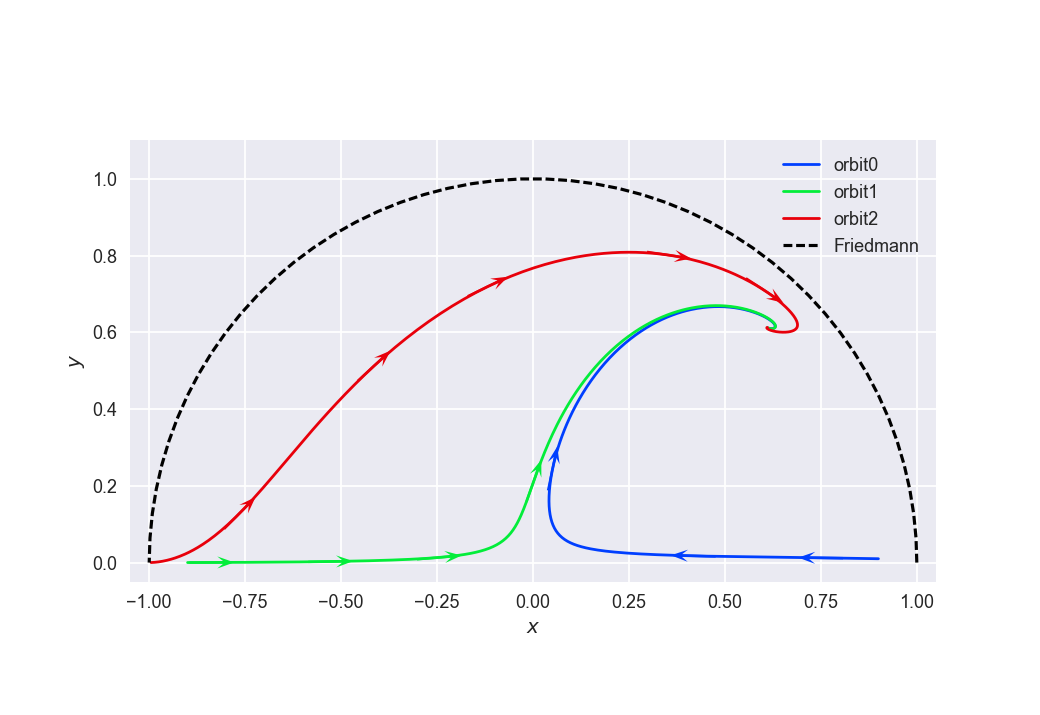

In [5]:
_lambda = 2.0

t = np.linspace(0.0, 10.0, 500)

var_names = {'x': r'$x$', 'y': r'$y$'}

arrow_pos = [1, 5, 10, 20, 30]

orbits = [{'vars': OrderedDict([('x', 0.9), ('y', 0.01)]), 't': t, 'arrow_pos': [20, 50, 160], 'label': 'orbit0'},
          {'vars': OrderedDict([('x', -0.9), ('y', 0.0001)]), 't': t, 'arrow_pos': [10, 40, 70, 150], 'label': 'orbit1'},
          {'vars': OrderedDict([('x', -0.995), ('y', 0.0001)]), 't': t, 'arrow_pos': [70, 90, 100, 120, 150], 'label': 'orbit2'},
         ]
dynsys = BaseDynSys(model=dm_plus_quintessence_dynsys,
                    model_pars=[_lambda],
                    var_names=var_names,
                    Ndim=2,
                    orbits=orbits,
                    lines=None,
                    #colors='black',
                    #colors='dark'
                    colors='bright'
                    )
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)

dynsys.plot_orbits(ax=ax3, vars_to_plot=['x', 'y'], add_flow=True, lw=2)
plot_circle(ax=ax3, theta_i=0, theta_f=np.pi, ls='--', color='k', label='Friedmann')
ax3.set_ylim(-0.05, 1.1)
ax3.set_xlim(-1.05, 1.05)
ax3.legend(loc='best')
ax3.set_aspect('equal')